In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import PyQt5

In [2]:
pmra_outliers= pd.read_csv('pmra_outliers.csv')

In [3]:
pmra_outliers.head()

,Unnamed: 0,source_id,ra,dec,l,b,parallax,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,dr2_radial_velocity,dr2_radial_velocity_error,r_med_geo,r_lo_geo,r_hi_geo,cube_id,pmra_deviation,pmdec_deviation
0,145572,2343051792663454976,9.988743,-28.035375,12.649668,-87.298757,4.889204,315.47690,364.193786,0.014907,-147.380689,0.013941,-46.355637,2.122902,203.731020,203.10910,204.340560,0,-343.797461,127.025179
1,2234418,2318914523136657792,8.259353,-29.074708,6.234956,-85.500016,11.751412,852.61940,-127.881662,0.015425,-69.914325,0.013069,-2.713808,0.216948,84.893135,84.78940,85.005550,0,148.277987,49.558816
2,2235300,2320174597821925504,5.224313,-29.690209,10.261629,-82.814269,12.224113,379.63440,-116.179322,0.033126,-85.228552,0.031795,-6.365917,0.192952,81.603070,81.38137,81.827560,0,136.575647,64.873043
3,2236525,2321900178242305664,5.197157,-28.899680,16.477153,-83.008911,14.723607,113.35716,-124.597912,0.109571,-249.947421,0.117070,37.947906,1.550238,67.946014,67.39255,68.458755,0,144.994237,229.591912
4,2237181,2316954295766878080,4.951248,-30.906005,2.406730,-82.123134,2.956088,194.06468,200.038259,0.015128,-30.805249,0.015542,-23.742700,4.483841,334.139280,332.69025,335.533540,0,-179.641934,10.449740


In [4]:
cubes= pd.read_csv('cubos.csv')

In [5]:
cubes

,Unnamed: 0,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,0,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,1,187.378088,28.421053,-85.263158,28.027875,-24.087528,85.808060,123.094400
2,2,187.378088,47.368421,-85.263158,30.149371,-17.954832,58.382921,44.824317
3,3,187.378088,66.315789,-85.263158,22.858752,-21.608687,53.615574,35.308682
4,4,187.378088,85.263158,-85.263158,29.330315,-20.488036,78.836805,42.225514
...,...,...,...,...,...,...,...,...
6854,6854,991.069513,274.736842,85.263158,NaN,NaN,NaN,NaN
6855,6855,991.069513,293.684211,85.263158,2.716697,-8.621976,8.697161,9.351986
6856,6856,991.069513,312.631579,85.263158,-0.849081,-9.210974,0.000000,0.000000
6857,6857,991.069513,331.578947,85.263158,NaN,NaN,NaN,NaN


In [6]:
cubes.rename(columns={f'{cubes.columns[0]}': 'cube_id'}, inplace=True)

In [7]:
cubes

,cube_id,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,0,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,1,187.378088,28.421053,-85.263158,28.027875,-24.087528,85.808060,123.094400
2,2,187.378088,47.368421,-85.263158,30.149371,-17.954832,58.382921,44.824317
3,3,187.378088,66.315789,-85.263158,22.858752,-21.608687,53.615574,35.308682
4,4,187.378088,85.263158,-85.263158,29.330315,-20.488036,78.836805,42.225514
...,...,...,...,...,...,...,...,...
6854,6854,991.069513,274.736842,85.263158,NaN,NaN,NaN,NaN
6855,6855,991.069513,293.684211,85.263158,2.716697,-8.621976,8.697161,9.351986
6856,6856,991.069513,312.631579,85.263158,-0.849081,-9.210974,0.000000,0.000000
6857,6857,991.069513,331.578947,85.263158,NaN,NaN,NaN,NaN


In [8]:
data=pmra_outliers.merge(cubes, on='cube_id') #merging outliers with their cubes

## Clustering

The idea consists in grouping the outliers based on their position and see if there's a movement correlation among the ones that are near each other on the plane (we're not taking distance into acount since the outliers are in the same cube, they're not so far from each other).

In [9]:
data

,Unnamed: 0,source_id,ra,dec,l,b,parallax,parallax_over_error,pmra,pmra_error,...,cube_id,pmra_deviation,pmdec_deviation,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,145572,2343051792663454976,9.988743,-28.035375,12.649668,-87.298757,4.889204,315.476900,364.193786,0.014907,...,0,-343.797461,127.025179,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,2234418,2318914523136657792,8.259353,-29.074708,6.234956,-85.500016,11.751412,852.619400,-127.881662,0.015425,...,0,148.277987,49.558816,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
2,2235300,2320174597821925504,5.224313,-29.690209,10.261629,-82.814269,12.224113,379.634400,-116.179322,0.033126,...,0,136.575647,64.873043,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
3,2236525,2321900178242305664,5.197157,-28.899680,16.477153,-83.008911,14.723607,113.357160,-124.597912,0.109571,...,0,144.994237,229.591912,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
4,2237181,2316954295766878080,4.951248,-30.906005,2.406730,-82.123134,2.956088,194.064680,200.038259,0.015128,...,0,-179.641934,10.449740,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27266,327246,1359656942198090752,255.861981,46.274529,72.007854,37.501015,0.996803,100.354034,-29.076734,0.011738,...,6748,26.777932,-6.963259,991.069513,66.315789,37.894737,-2.298802,-5.128035,6.600658,9.988654
27267,1402670,1120087136760813184,143.275147,72.480123,139.720019,37.483382,0.979216,67.712300,-31.032814,0.013591,...,6752,29.377110,11.478355,991.069513,142.105263,37.894737,-1.655703,-2.378986,7.731766,5.681591
27268,1506897,6266416868952173056,233.993394,-13.301407,352.836728,33.190451,0.976034,44.830917,-37.588491,0.026773,...,6763,30.307629,8.739459,991.069513,350.526316,37.894737,-7.280862,-5.414850,9.092020,7.683418
27269,1144747,4430421119884154752,234.810426,6.118888,12.901496,44.969711,0.969873,48.953423,-65.569933,0.020320,...,6764,54.256925,13.878931,991.069513,9.473684,47.368421,-11.313008,-3.746934,14.668983,8.343572


In [10]:
cubes

,cube_id,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec
0,0,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094
1,1,187.378088,28.421053,-85.263158,28.027875,-24.087528,85.808060,123.094400
2,2,187.378088,47.368421,-85.263158,30.149371,-17.954832,58.382921,44.824317
3,3,187.378088,66.315789,-85.263158,22.858752,-21.608687,53.615574,35.308682
4,4,187.378088,85.263158,-85.263158,29.330315,-20.488036,78.836805,42.225514
...,...,...,...,...,...,...,...,...
6854,6854,991.069513,274.736842,85.263158,NaN,NaN,NaN,NaN
6855,6855,991.069513,293.684211,85.263158,2.716697,-8.621976,8.697161,9.351986
6856,6856,991.069513,312.631579,85.263158,-0.849081,-9.210974,0.000000,0.000000
6857,6857,991.069513,331.578947,85.263158,NaN,NaN,NaN,NaN


In [11]:
from sklearn.cluster import DBSCAN

#eps: max distance to classified a particle as neighbor
#min_samples: min number of points to consider particle as core
clusters_save= []
for id in cubes.cube_id:
    cube= pd.concat([data.query(f'cube_id == {id}')])

    if len(cube)!=0:
        clusters= DBSCAN(eps=1, min_samples=1).fit(cube.loc[:,['ra', 'dec', 'r_med']])
        cube['label']= clusters.labels_

        clusters_save.append(cube)

    continue

    plt.figure(figsize=(10,5))
    ax1=plt.subplot(1,2,1)
    ax1.set_title(f'Outliers movement, cube {id}')
    color= sns.color_palette()[:len(cube.label)]
    ax1.quiver(cube.ra.mean(), cube.dec.mean(), cube.pmra_med.unique()[0], cube.pmdec_med.unique()[0], color='k', label='pm_med_cube')
    for i, lab in enumerate(cube.label.unique()):
        cluster= cube.query(f'label=={lab}')
        ax1.quiver(cluster.ra, cluster.dec, cluster.pmra, cluster.pmdec, color=color[i])

    ax2=plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
    ax2.set_title(f'Outlier clusters movement, cube {id}')
    color= sns.color_palette()[:len(cube.label)]
    ax2.quiver(cube.ra.mean(), cube.dec.mean(), cube.pmra_med.unique()[0], cube.pmdec_med.unique()[0], color='k', label='pm_med_cube')
    for i, lab in enumerate(cube.label.unique()):
        cluster= cube.query(f'label=={lab}')
        ax2.quiver(cluster.ra.mean(), cluster.dec.mean(), cluster.pmra.mean(), cluster.pmdec.mean(), color=color[i])

    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Each row represent not a star but a cluster classified by dbscan.

In [12]:
clusters_save[0]

,Unnamed: 0,source_id,ra,dec,l,b,parallax,parallax_over_error,pmra,pmra_error,...,pmra_deviation,pmdec_deviation,r_med,l_med,b_med,pmra_med,pmdec_med,std_pmra,std_pmdec,label
0,145572,2343051792663454976,9.988743,-28.035375,12.649668,-87.298757,4.889204,315.47690,364.193786,0.014907,...,-343.797461,127.025179,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094,0
1,2234418,2318914523136657792,8.259353,-29.074708,6.234956,-85.500016,11.751412,852.61940,-127.881662,0.015425,...,148.277987,49.558816,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094,1
2,2235300,2320174597821925504,5.224313,-29.690209,10.261629,-82.814269,12.224113,379.63440,-116.179322,0.033126,...,136.575647,64.873043,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094,2
3,2236525,2321900178242305664,5.197157,-28.899680,16.477153,-83.008911,14.723607,113.35716,-124.597912,0.109571,...,144.994237,229.591912,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094,2
4,2237181,2316954295766878080,4.951248,-30.906005,2.406730,-82.123134,2.956088,194.06468,200.038259,0.015128,...,-179.641934,10.449740,187.378088,9.473684,-85.263158,20.396325,-20.355509,45.445484,37.075094,3


In [14]:
from astropy.coordinates import ICRS
from astropy import units as u

In [15]:
data_cartesian= ICRS(distance= clusters_save[0]['r_med_geo']*u.pc, dec=clusters_save[0]['dec']*u.degree, ra=clusters_save[0]['ra']*u.degree, \
                pm_ra_cosdec= clusters_save[0]['pmra']*u.mas/u.yr, pm_dec= clusters_save[0]['pmdec']*u.mas/u.yr, radial_velocity= clusters_save[0]['dr2_radial_velocity']*u.km/u.s)
clusters_save[0]['x']= data_cartesian.cartesian.x.value
clusters_save[0]['y']= data_cartesian.cartesian.y.value
clusters_save[0]['z']= data_cartesian.cartesian.z.value
clusters_save[0]['vx']= data_cartesian.velocity.d_x.value
clusters_save[0]['vy']= data_cartesian.velocity.d_y.value
clusters_save[0]['vz']= data_cartesian.velocity.d_z.value

In [16]:
clusters_save[0]

,Unnamed: 0,source_id,ra,dec,l,b,parallax,parallax_over_error,pmra,pmra_error,...,pmdec_med,std_pmra,std_pmdec,label,x,y,z,vx,vy,vz
0,145572,2343051792663454976,9.988743,-28.035375,12.649668,-87.298757,4.889204,315.47690,364.193786,0.014907,...,-20.355509,45.445484,37.075094,0,177.098917,31.191443,-95.756963,-167.192274,327.698413,-103.847310
1,2234418,2318914523136657792,8.259353,-29.074708,6.234956,-85.500016,11.751412,852.61940,-127.881662,0.015425,...,-20.355509,45.445484,37.075094,1,73.425922,10.658490,-41.253787,-8.485032,-53.234917,-23.271596
2,2235300,2320174597821925504,5.224313,-29.690209,10.261629,-82.814269,12.224113,379.63440,-116.179322,0.033126,...,-20.355509,45.445484,37.075094,2,70.595419,6.454892,-40.418836,-17.677278,-46.746252,-25.488079
3,2236525,2321900178242305664,5.197157,-28.899680,16.477153,-83.008911,14.723607,113.35716,-124.597912,0.109571,...,-20.355509,45.445484,37.075094,2,59.239961,5.388295,-32.836780,-2.026413,-40.482485,-88.820681
4,2237181,2316954295766878080,4.951248,-30.906005,2.406730,-82.123134,2.956088,194.06468,200.038259,0.015128,...,-20.355509,45.445484,37.075094,3,285.625399,24.744110,-171.624354,-72.611740,311.752405,-29.671503


In [18]:
%matplotlib qt5

In [20]:
plt.figure()
ax=plt.axes(projection='3d')

color= sns.color_palette()[:len(clusters_save[0].label)]
for i,lab in enumerate(clusters_save[0].label):
    test= clusters_save[0].query(f'`label`=={lab}')
    ax.quiver(test['x'], test['y'], test['z'], test['vx'], test['vy'], test['vz'], length=5, normalize=True, color=color[i])

Index(['Unnamed: 0', 'source_id', 'ra', 'dec', 'l', 'b', 'parallax',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'dr2_radial_velocity', 'dr2_radial_velocity_error', 'r_med_geo',
       'r_lo_geo', 'r_hi_geo', 'cube_id', 'pmra_deviation', 'pmdec_deviation',
       'r_med', 'l_med', 'b_med', 'pmra_med', 'pmdec_med', 'std_pmra',
       'std_pmdec', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'label'],
      dtype='object')

## Trying to see it 3d

In [23]:
from astropy.coordinates import ICRS
from astropy import units as u

In [24]:
data.columns

Index(['Unnamed: 0', 'source_id', 'ra', 'dec', 'l', 'b', 'parallax',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'dr2_radial_velocity', 'dr2_radial_velocity_error', 'r_med_geo',
       'r_lo_geo', 'r_hi_geo', 'cube_id', 'pmra_deviation', 'pmdec_deviation',
       'r_med', 'l_med', 'b_med', 'pmra_med', 'pmdec_med', 'std_pmra',
       'std_pmdec'],
      dtype='object')

In [25]:
data_cartesian= ICRS(distance= data['r_med_geo']*u.pc, dec=data['dec']*u.degree, ra=data['ra']*u.degree, \
                pm_ra_cosdec= data['pmra']*u.mas/u.yr, pm_dec= data['pmdec']*u.mas/u.yr, radial_velocity= data['dr2_radial_velocity']*u.km/u.s)
data['x']= data_cartesian.cartesian.x.value
data['y']= data_cartesian.cartesian.y.value
data['z']= data_cartesian.cartesian.z.value
data['vx']= data_cartesian.velocity.d_x.value
data['vy']= data_cartesian.velocity.d_y.value
data['vz']= data_cartesian.velocity.d_z.value

In [30]:
clusters= DBSCAN(eps=1, min_samples=1).fit(data.loc[:,['ra', 'dec']])
data['label']= clusters.labels_

In [31]:
test=data[:1000]

In [41]:
%matplotlib widget

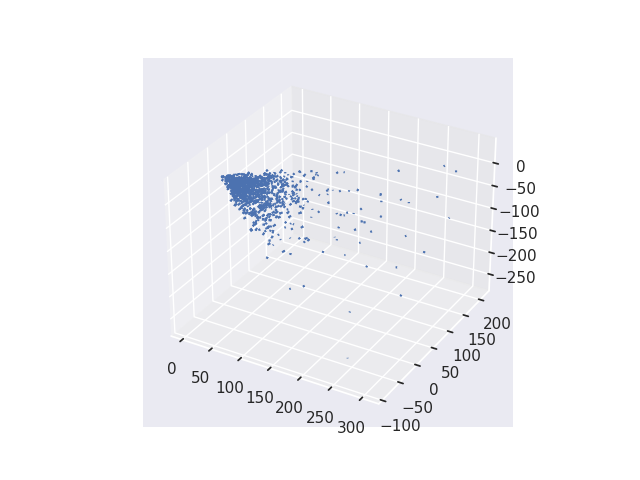

In [42]:
plt.figure()
ax=plt.axes(projection='3d')

color= sns.color_palette()[:len(data.label)]
ax.quiver(test['x'], test['y'], test['z'], test['vx'], test['vy'], test['vz'], length=5, normalize=True)